In [108]:
%matplotlib inline
#Import basic packages
import numpy as np 
import pandas as pd
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from IPython.display import display
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.datasets import make_imbalance
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [97]:
df = pd.read_csv('creditcard.csv')

In [98]:
df.shape

(284807, 31)

In [99]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [100]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [101]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [102]:
#label i/p o/p class
X = df.drop('Time',axis=1)
y = df.Class

#show the no of records and positive examples  
all_records= len(df)
number_records_fraud = len(df[df.Class == 1])
print(all_records,number_records_fraud)

#SMOTE sampling

X_resample, y_resample = SMOTE().fit_sample(X, y)
print ('The number of transactions after resampling : ' + str(len(X_resample)))
print ('If the number of frauds is equal to the number of normal tansactions? '+ str(sum(y_resample == 0) == sum(y_resample == 1)))

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3, random_state=0)

(284807, 492)
The number of transactions after resampling : 568630
If the number of frauds is equal to the number of normal tansactions? True


In [91]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
testscoreLR=accuracy_score(y_test,lr.predict(X_test))
print('logistic regression accuracy score:'+str(testscoreLR))
print(confusion_matrix(y_test,lr.predict(X_test)))
print(classification_report(y_test,lr.predict(X_test)))

logistic regression accuracy score:1.0
[[85172     0]
 [    0 85417]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85172
          1       1.00      1.00      1.00     85417

avg / total       1.00      1.00      1.00    170589



In [90]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
testscoreRF=accuracy_score(y_test,rf.predict(X_test))
print('Random Forest accuracy score:'+str(testscoreRF))

Random Forest accuracy score:1.0


In [70]:
print(confusion_matrix(y_test,rf.predict(X_test)))
print(classification_report(y_test,rf.predict(X_test)))

[[85153    19]
 [    1 85416]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85172
          1       1.00      1.00      1.00     85417

avg / total       1.00      1.00      1.00    170589



In [92]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = X.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= lr.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X.columns.values
)
data = [trace]
layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [103]:
#creating target series
target=df['Class']
target

#dropping the target variable from the data set
df.drop('Class',axis=1,inplace=True)
df.shape

#converting the data and target to numpy arrays
X=np.array(df)
y=np.array(target)
X.shape
y.shape

#distribution of the target variable
print(len(y[y==1]),len(y[y==0]))

#splitting the data set into train and test (75:25)
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(492, 284315)
((213605, 30), (71202, 30), (213605,), (71202,))


In [104]:
#applyting SMOTE to oversample the minority class-it will produce data with equal ratio of the target
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_sm,y_sm=sm.fit_sample(X_train,y_train)
print(X_sm.shape,y_sm.shape)
print(len(y_sm[y_sm==1]),len(y_sm[y_sm==0]))

((426448, 30), (426448,))
(213224, 213224)


('Confusion Matrix:\n', array([[70155,   936],
       [   19,    92]]))
('Accuracy:\n', 0.98658745540855597)
('Precision:\n', 0.089494163424124515)
('Recall:\n', 0.8288288288288288)
('AUC:\n', 0.945549423331421)


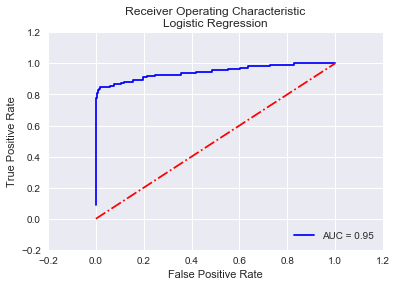

In [105]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

#Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_sm,y_sm)
y_logreg=logreg.predict(X_test)
y_logreg_prob=logreg.predict_proba(X_test)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_logreg))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_logreg))
print("Precision:\n",metrics.precision_score(y_test,y_logreg))
print("Recall:\n",metrics.recall_score(y_test,y_logreg))
print("AUC:\n",metrics.roc_auc_score(y_test,y_logreg_prob))
auc=metrics.roc_auc_score(y_test,y_logreg_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

('Confusion Matrix:\n', array([[71076,    15],
       [   23,    88]]))
('Accuracy:\n', 0.99946630712620432)
('Precision:\n', 0.85436893203883491)
('Recall:\n', 0.7927927927927928)
('AUC:\n', 0.93508985628241226)


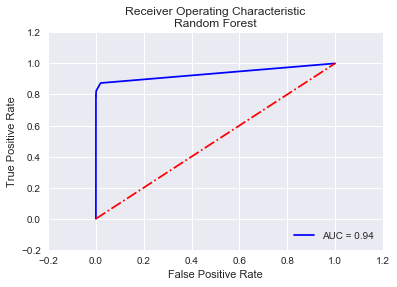

In [106]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=3)
rf.fit(X_sm,y_sm)
y_rf=rf.predict(X_test)
y_rf_prob=rf.predict_proba(X_test)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf))
print("Precision:\n",metrics.precision_score(y_test,y_rf))
print("Recall:\n",metrics.recall_score(y_test,y_rf))
print("AUC:\n",metrics.roc_auc_score(y_test,y_rf_prob))
auc=metrics.roc_auc_score(y_test,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'